In [1]:
%matplotlib notebook
%matplotlib widget
%matplotlib inline

import json

prefix = "../data/output/adversarial/"
tc_advs = json.load(open(prefix + "tourist_tc_adversarial.json"))
tc_normal = json.load(open(prefix + "tourist_tc_normal.json"))
mmr_advs = json.load(open(prefix + "tourist_mmr_adversarial.json"))
mmr_normal = json.load(open(prefix + "tourist_mmr_normal.json"))

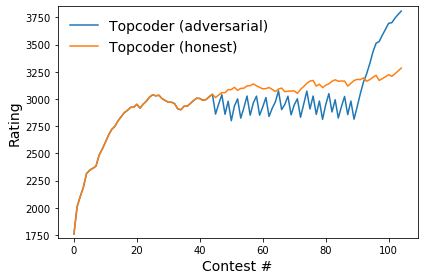

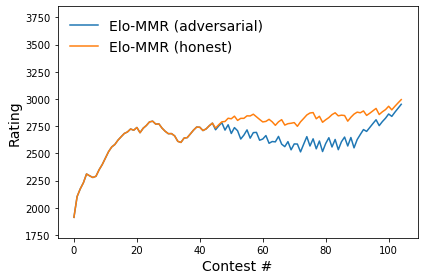

In [9]:
#import seaborn as sns
from seaborn import lineplot
import matplotlib.pyplot as plt

#plt.rcParams["figure.figsize"] = (3.5,4*3.5/5)

#sns.set(rc={'figure.figsize':(3.7,3.7)})

get_ratings = lambda js : [c['rating_mu'] for c in js]

jsons = [tc_advs, tc_normal, mmr_advs, mmr_normal]
names = ["Topcoder (adversarial)", "Topcoder (honest)", "Elo-MMR (adversarial)", "Elo-MMR (honest)"]
for idx, (rating_json, name) in enumerate(zip(jsons, names)):
    ratings = get_ratings(rating_json)
    contestnum = list(range(len(ratings)))
        
    plot = lineplot(contestnum, ratings, label=name)
    plot.legend(frameon=False, fontsize=14, loc="upper left")
    plot.set_xlabel("Contest #", fontsize=14)
    plot.set_ylabel("Rating", fontsize=14)
    plot.set_ylim(1725, 3850)
#     plot.axes.set_aspect(1.0/15)
    
#     if idx == 2 or idx == 3:
#         plot.axes.get_yaxis().set_visible(False)
    
    plt.tight_layout()
    
    if idx == 1:
        plt.savefig('topcoder.eps', bbox_inches='tight', dpi = 400)
        plt.figure()
        
    if idx == 3:
        plt.savefig('elo-mmr.eps', bbox_inches='tight', dpi = 400)
        


In [8]:
len(ratings)

105